## Research Question

Is there any relationship between variables **diet** taken and **weight loss** by a respondent? I have taken the dataset **diet_exercise** to perform this test.

The dataset consist of two explanatory variables **Exercise** and **Diet** (Categorical in nature) and the response variable **WeightLoss**. Since the explanatory variable is categorical in nature and **WeightLoss** variable is numerical in nature, we need to perform the **ANOVA** test to check for any relationship between these two variables. And we can ignore the variable **Exercise** as of now as we are only interested in knowing the relationship between the variables **Diet** and **WeightLoss**.

## Loading libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi

## Loading the data

In [2]:
data = pd.read_csv("diet_exercise.csv")

In [3]:
data.shape

(40, 3)

In [4]:
data.head(n=3)

,Exercise,Diet,WeightLoss
0,Cardio,A,22.6
1,Cardio,A,18.9
2,Cardio,A,20.2


In [5]:
# removing the unnecessary variable
data = data.drop('Exercise', axis=1)

## Setting Hypothesis

As we are testing the relationship between the variables **Diet** and **WeightLoss**, we can explain the null hypothesis as follows-

<ol><li>**Null Hypothesis:** There is nothing going on between the variables, there is no relationship between the two variables, in mathematical terms \begin{align}
\\H_0: \mu_A & = \mu_B 
\end{align}</li><br><li>**Alternate Hypothesis:** There is something going on between the explanatory and response variable, or there is a relationship between the two, in mathematical terms \begin{align}
\\H_A: \mu_A & \neq \mu_B 
\end{align}</li></ol>

## Visualizing data

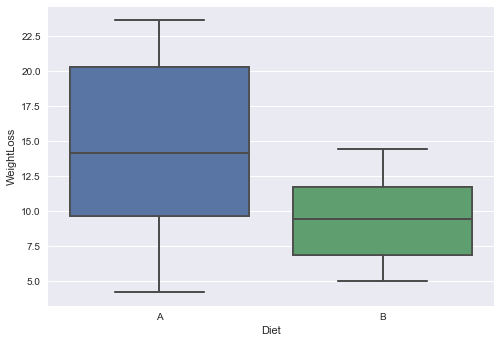

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x=data['Diet'], y=data['WeightLoss'])
plt.show()

From the above plot it looks like the mean of these two groups of observations (Diet A and Diet B) are different from each other. It signifies the distributions for these two Diet categories are from two independent populations and there is a relationship between the variable **Diet** and **WeightLoss**. But we need to prove this visual inference through a statistical test.

In [19]:
# using ols function for calculating the F-statistic and associated p value
model1 = smf.ols(formula='WeightLoss ~ C(Diet)', data=data)
results1 = model1.fit()
print (results1.summary())

                            OLS Regression Results                            
Dep. Variable:             WeightLoss   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     12.00
Date:                Sat, 16 Sep 2017   Prob (F-statistic):            0.00133
Time:                        21:02:46   Log-Likelihood:                -119.06
No. Observations:                  40   AIC:                             242.1
Df Residuals:                      38   BIC:                             245.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       14.6550      1.089     13.457   

From the statistical results above we get **p-value = 0.00133** which is less than the standard significance level 0.05. Therefore we can reject our null hypothesis as the data shows significant evidence that probability of finding the observed or more extreme results provided the null hypothesis is true is very very less. So the relationship between the variable **Diet** and **WeightLoss** is statistically significant.